In [3]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

# MAGIC Gamma Telescope Data Set

Jeff Jiang

1840801

The main idea for the final project is to use machine learning to separate the signal and the background in the simulate MAGIC gamma telescope data set. The data I am going to use are machine-generated to simulate the registration of high energy gamma particles in the Major Atmospheric Gamma Imaging Cherenkov (MAGIC) telescope. The source of the data is from this website: https://archive.ics.uci.edu/ml/datasets/magic+gamma+telescope




Gamma rays are the highest energy forms of light, which are not produced as part of normal thermal processes. In order to determine the gamma rays requires filtering the other Cosmic rays in the background. 
The MAGIC telescope observes high energy gamma rays, taking advantage of the radiation emitted by charged particles produced inside the electromagnetic showers initiated by the gammas, and developing in the atmosphere. This Cherenkov radiation (of visible to UV wavelengths) leaks through the atmosphere and gets recorded in the detector, allowing reconstruction of the shower parameters. 


The simulate MAGIC gamma telescope data set given in Hillas parameter:

1. fLength: continuous # major axis of ellipse [mm]m
2. fWidth: continuous # minor axis of ellipse [mm]
3. fSize: continuous # 10-log of sum of content of all pixels [in #phot]
4. fConc: continuous # ratio of the sum of the two highest pixels over fSize [ratio]
5. fConc1: continuous # ratio of the highest pixel over fSize [ratio]
6. fAsym: continuous # distance from the highest pixel to center, projected onto major axis [mm]
7. fM3Long: continuous # 3rd root of the third moment along major axis [mm]
8. fM3Trans: continuous # 3rd root of the third moment along minor axis [mm]
9. fAlpha: continuous # angle of major axis with vector to origin [deg]
10. fDist: continuous # distance from the origin to the center of ellipse [mm]
11. class: g,h # gamma (signal), hadron (background)

Below is parameters given by the simulate MAGIC data. The data include the cosmic rays (hadron) and gamma rays, since the cosmic rays produce similar interaction products as the gamma rays. 

In [7]:
col_names = ['fLength', 'fWidth', 'fSize', 'fConc', 'fConc1', 'fAsym',  'fM3Long', 'fM3Trans', 'fAlpha', 'fDist', 'class']
feature_names = ['fLength', 'fWidth', 'fSize', 'fConc', 'fConc1', 'fAsym',  'fM3Long', 'fM3Trans', 'fAlpha', 'fDist']
data = pd.read_csv("magic04.data", names=col_names)
X = data[feature_names]
Y = data['class'].replace({'g':1,'h':0})
data.head()

fLength    fWidth   fSize   fConc  fConc1     fAsym  fM3Long  fM3Trans  \
0   28.7967   16.0021  2.6449  0.3918  0.1982   27.7004  22.0110   -8.2027   
1   31.6036   11.7235  2.5185  0.5303  0.3773   26.2722  23.8238   -9.9574   
2  162.0520  136.0310  4.0612  0.0374  0.0187  116.7410 -64.8580  -45.2160   
3   23.8172    9.5728  2.3385  0.6147  0.3922   27.2107  -6.4633   -7.1513   
4   75.1362   30.9205  3.1611  0.3168  0.1832   -5.5277  28.5525   21.8393   

    fAlpha     fDist class  
0  40.0920   81.8828     g  
1   6.3609  205.2610     g  
2  76.9600  256.7880     g  
3  10.4490  116.7370     g  
4   4.6480  356.4620     g

As shown on the table above there are no missing values so we don’t have to use the awkward array, instead we use the panda data frame to process the data.

Table below desctibe some statistics feature of the data. 

In [3]:
data.describe()

fLength        fWidth         fSize         fConc        fConc1  \
count  19020.000000  19020.000000  19020.000000  19020.000000  19020.000000   
mean      53.250154     22.180966      2.825017      0.380327      0.214657   
std       42.364855     18.346056      0.472599      0.182813      0.110511   
min        4.283500      0.000000      1.941300      0.013100      0.000300   
25%       24.336000     11.863800      2.477100      0.235800      0.128475   
50%       37.147700     17.139900      2.739600      0.354150      0.196500   
75%       70.122175     24.739475      3.101600      0.503700      0.285225   
max      334.177000    256.382000      5.323300      0.893000      0.675200   

              fAsym       fM3Long      fM3Trans        fAlpha         fDist  
count  19020.000000  19020.000000  19020.000000  19020.000000  19020.000000  
mean      -4.331745     10.545545      0.249726     27.645707    193.818026  
std       59.206062     51.000118     20.827439     26.103621     74.731787  
min     -457.916100   -331.780000   -205.894700      0.000000      1.282600  
25%      -20.586550    -12.842775    -10.849375      5.547925    142.492250  
50%        4.013050     15.314100      0.666200     17.679500    191.851450  
75%       24.063700     35.837800     10.946425     45.883550    240.563825  
max      575.240700    238.321000    179.851000     90.000000    495.561000

In order to better visualize the feature of the data, we plot the data in histograms and scatter plots. 

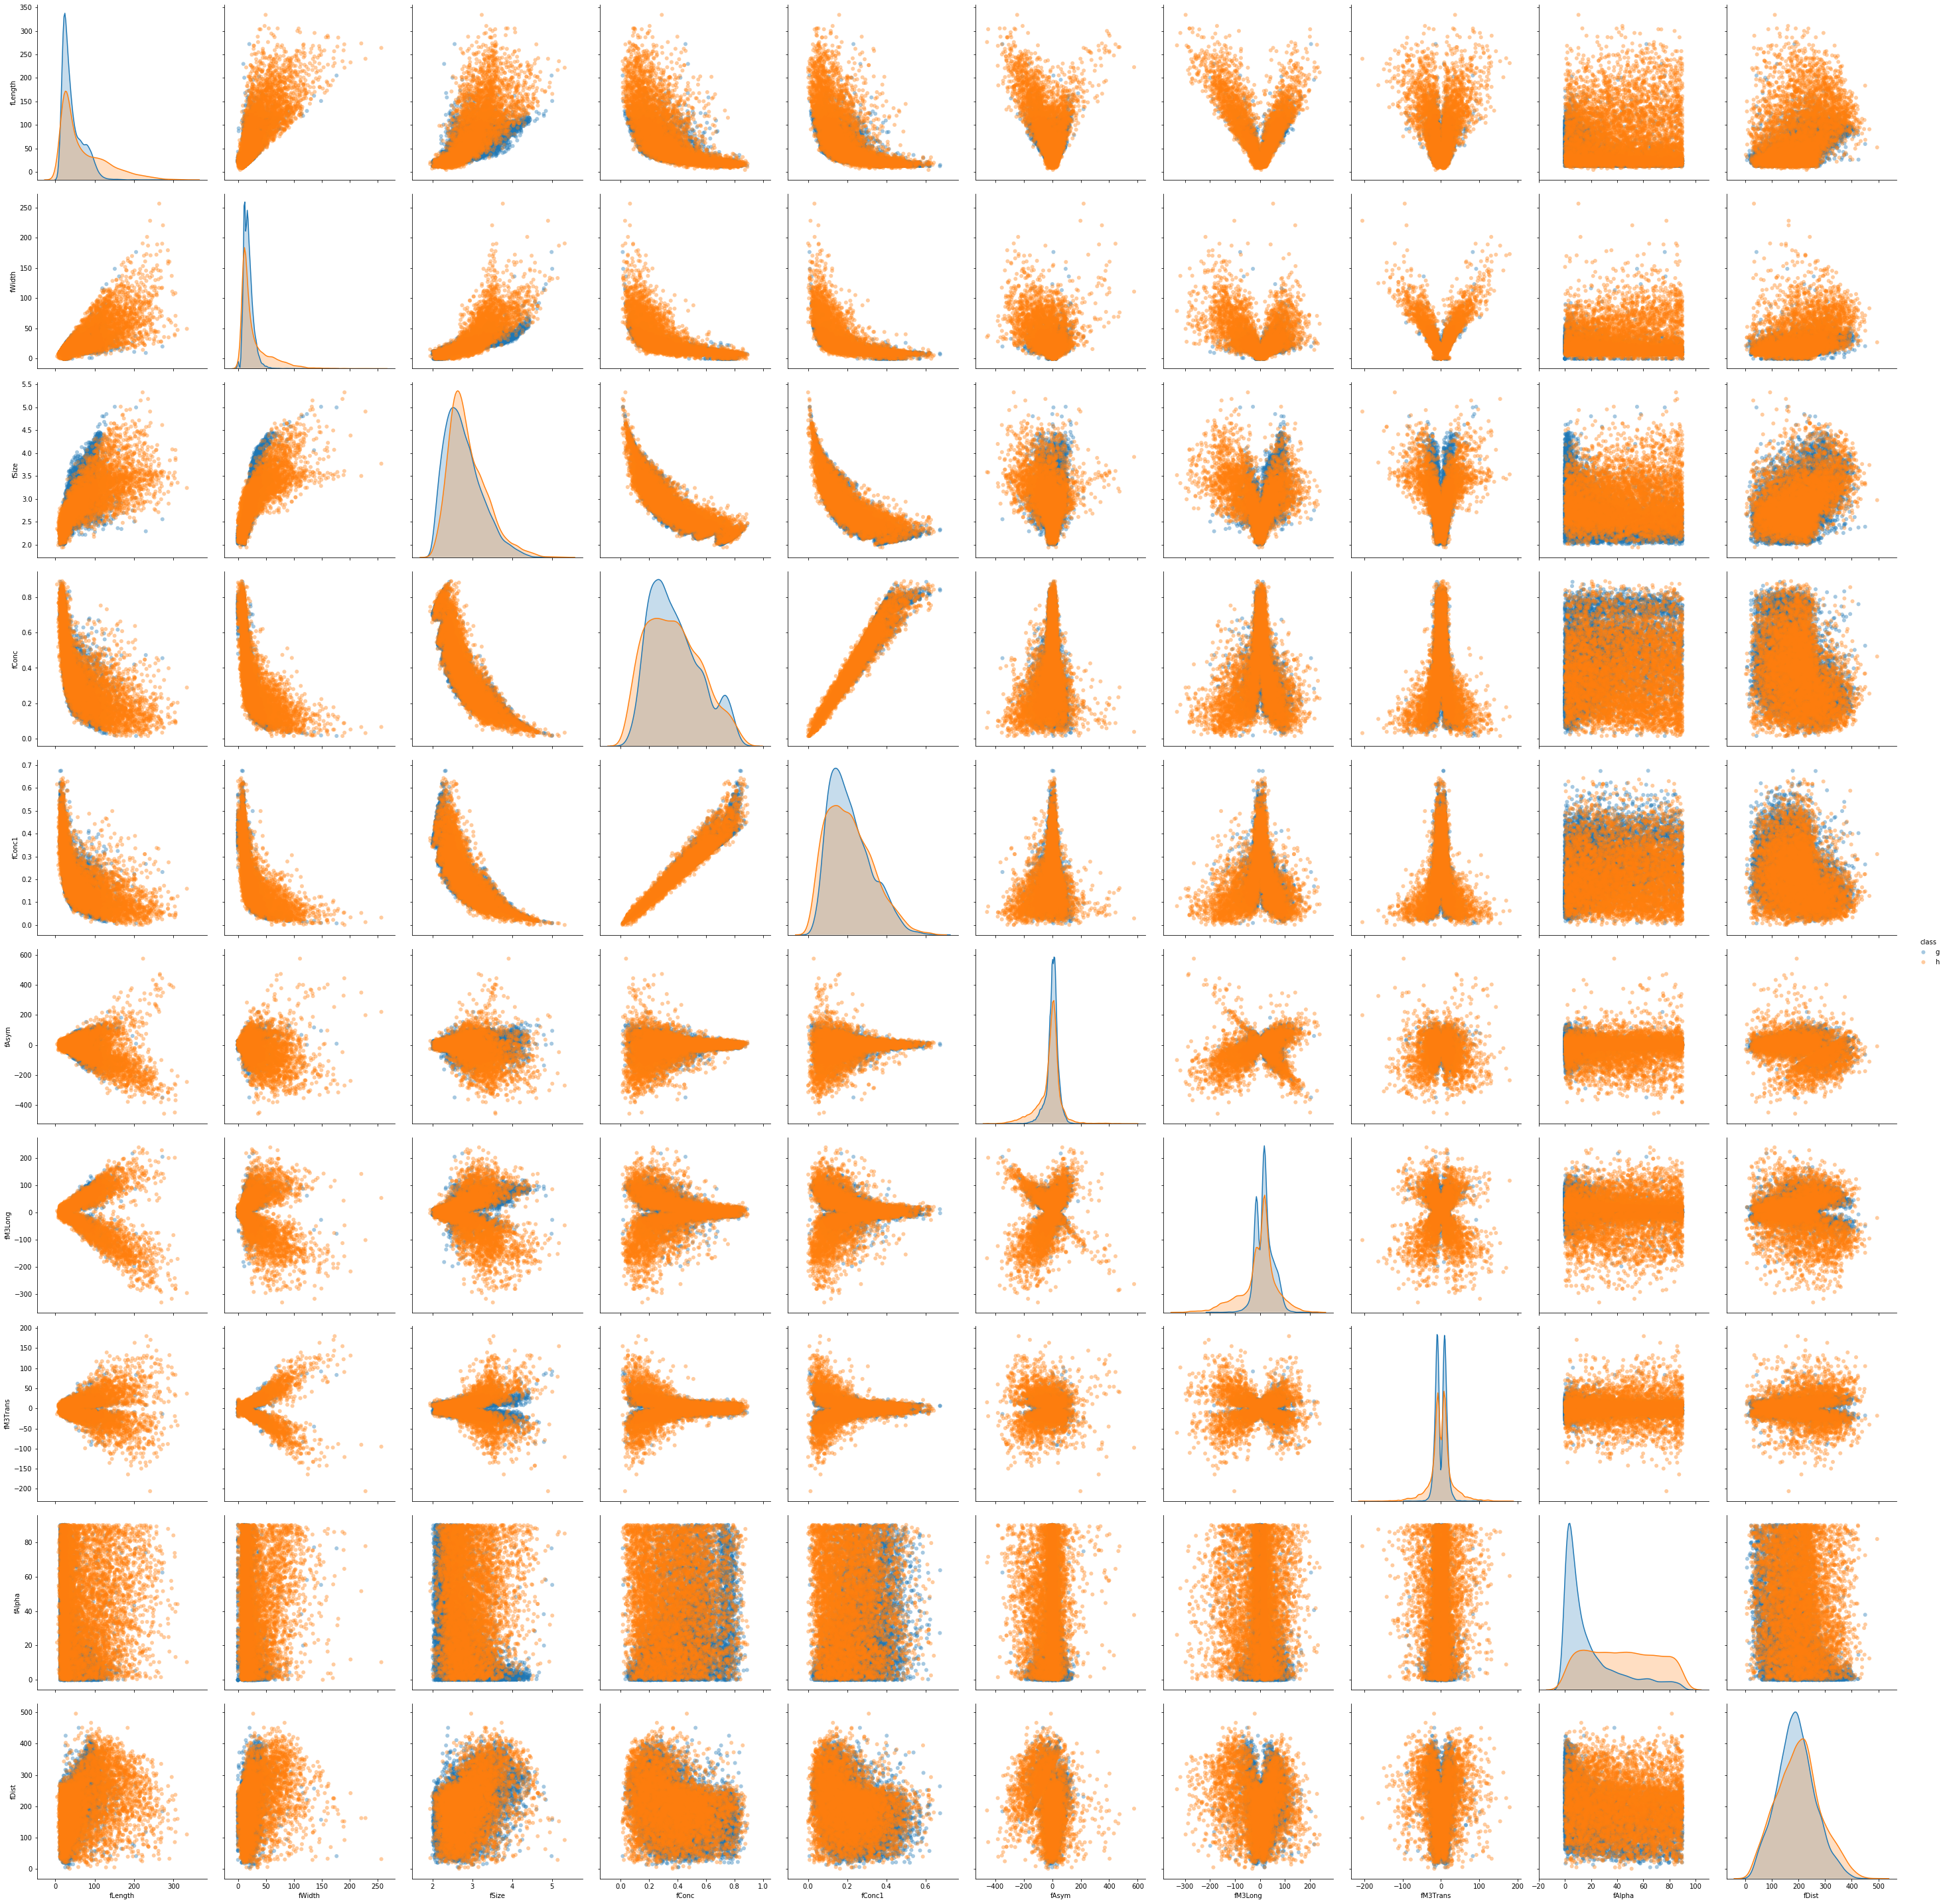

In [5]:
df = data.copy()
sns.pairplot(data=df, hue='class', plot_kws = {'alpha': 0.4, 'edgecolor': "none"},height = 4)

As all the scatter plot is shown, the signal and the background have a very similar range of values. It is hard to see any strong correlation between the signal and the background. 
As all the scatter plot is shown, the signal and the background have a very similar range of values. It is hard to see any strong correlation between the signal and the background. From the histograms, we see there is some difference between the signal and the background specifically the fAlpha parameter. 

Below is the graph showed the each of the parameter's correlation. 

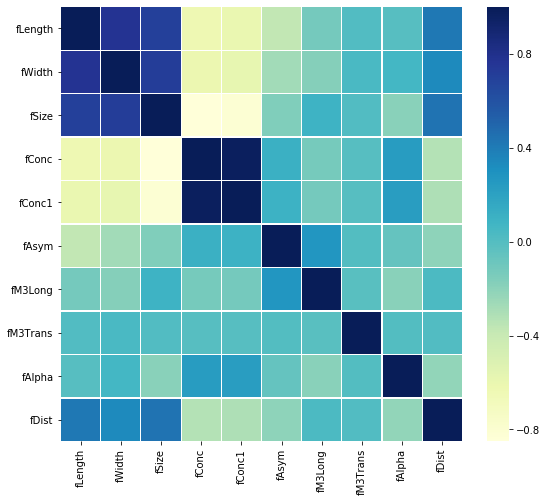

In [6]:
corrmat = df.corr() 
f, ax = plt.subplots(figsize =(9, 8)) 
sns.heatmap(corrmat, ax = ax, cmap ="YlGnBu", linewidths = 0.1)

As shown, the fconc and fconc1 has the highest correlation in the data. The flength, fwidth, and fsize has some correlation. The rest has a small correlation. 

In [17]:
# equation for split the data into train data and test data.
def data_split(X,Y, size = None):
    return train_test_split(X, Y,train_size = size)

In [92]:
# equation for forming a prediction with one of the algorithms given 
# return the number of the fails prediction, the test simple size, the percent 
# error of the prediction and what type of the algorithms is used to form prediction 
def algorithms_error(X_train, X_test, Y_train, Y_test,one_algorithm):
    algorithms = [DecisionTreeClassifier(),MLPClassifier(),LogisticRegression(solver='lbfgs'),KNeighborsClassifier()]
    regressor = algorithms[one_algorithm]
    Y_pred = regressor.fit(X_train, Y_train).predict(X_test)
    fails_predict = (Y_test != Y_pred).sum()
    test_size =len(Y_test)
    precent_error = fails_predict/len(Y_test)*100
    return [fails_predict,test_size,precent_error,one_algorithm]

We going to use some popular machine learning algorithms to predict the signal and background (Decision Trees, Neural Networks, Logistic Regression,and k-Nearest Neighbors)
me more )

    The decision tree builds regression or classification models in the form of a tree structure. It breaks down a dataset into smaller and smaller subsets while at the same time an associated decision tree is incrementally developed.
    
    Neural networks are a set of algorithms, modeled loosely after the human brain, that is designed to recognize patterns. They interpret sensory data through a kind of machine perception, labeling or clustering raw input.
    
    Logistic Regression, also known as Logit Regression or Logit Model, is a mathematical model used in statistics to estimate (guess) the probability of an event occurring having been given some previous data. Logistic Regression works with binary data, where either the event happens (1) or the event does not happen (0).
    
    K-nearest neighbor or K-NN algorithm basically creates an imaginary boundary to classify the data. When new data points come in, the algorithm will try to predict that to the nearest of the boundary line.


We find the number of fails predictions and calculate the percent error for each of the algorithms below.

In [89]:
X_train, X_test, Y_train, Y_test = data_split(X,Y, size = None)
algorithms_names = ['Decision Tree','Neural Networks','Logistic Regression','K-NN algorithm']
for i in range(4):
    error_info = algorithms_error(X_train, X_test, Y_train, Y_test,i)
    print(error_info[0], " out of ", error_info[1], 'are fails prediction')
    print('the percent error for ', algorithms_names[i], ' is ',error_info[2], '%')

858  out of  4755 are fails prediction
the percent error for  Decision Tree  is  18.04416403785489 %
817  out of  4755 are fails prediction
the percent error for  Neural Networks  is  17.18191377497371 %
985  out of  4755 are fails prediction
the percent error for  Logistic Regression  is  20.715036803364878 %
894  out of  4755 are fails prediction
the percent error for  K-NN algorithm  is  18.801261829652997 %


As shown above, the accuracy of the algorithms starts with Neural Networks, follow by Decision Tree, K-NN algorithm, then Logistic Regression. from high to low accuracy.

In [93]:
# equation for finding percent error with different train size.
def PE_change_size (train_size,algorithm):
    errors = np.empty(len(train_size))
    for j in range (len(train_size)):
        X_train, X_test, Y_train, Y_test = data_split(X,Y, size = train_size[j])
        error_info = algorithms_error(X_train, X_test, Y_train, Y_test,algorithm)
        errors[j] = error_info[2]
    return errors

Next, we investigate how the training size of the data will affect the percent error of the prediction for each of the algorithm?

We run the same predictions for different training sizes in oreder to see the change in the percent error.

In [105]:
train_size = np.arange(0.01, 0.91, 0.1)
DT = PE_change_size (train_size,0)
NN = PE_change_size (train_size,1)
LR = PE_change_size (train_size,2)
K_NN = PE_change_size (train_size,3)

C:\Users\jeffj\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Users\jeffj\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Users\jeffj\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Users\jeffj\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Users\jeffj\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", Convergenc

We plot the percent error with different train sizes in the figure below to see how the percent error changes with different training size. 

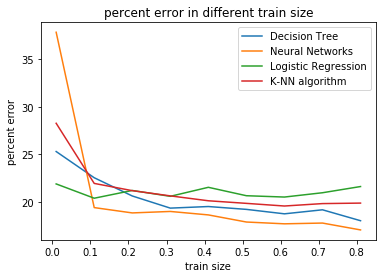

In [106]:
fig, ax = plt.subplots(1, 1)
ax.plot(train_size,DT,label=algorithms_names[0])
ax.plot(train_size,NN,label=algorithms_names[1])
ax.plot(train_size,LR,label=algorithms_names[2])
ax.plot(train_size,K_NN,label=algorithms_names[3])
plt.title("percent error in different train size")
plt.xlabel('percent train size')
plt.ylabel('percent error')
plt.legend()
plt.show()

As the plot shows the Logistic Regression is very consistent no matter how big is the train size. The Decision Tree, K-NN algorithm, and Neural Network lower the percent error as the percent training size increase. Overall the Neural Networks give the most accurate prediction as training size increases. 